<ipython-input-11-0a53073e8b5c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="pastel")


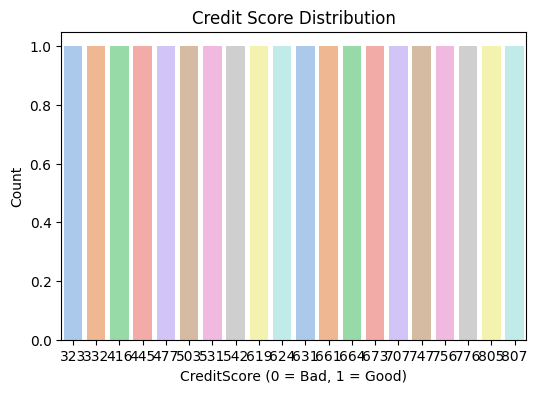

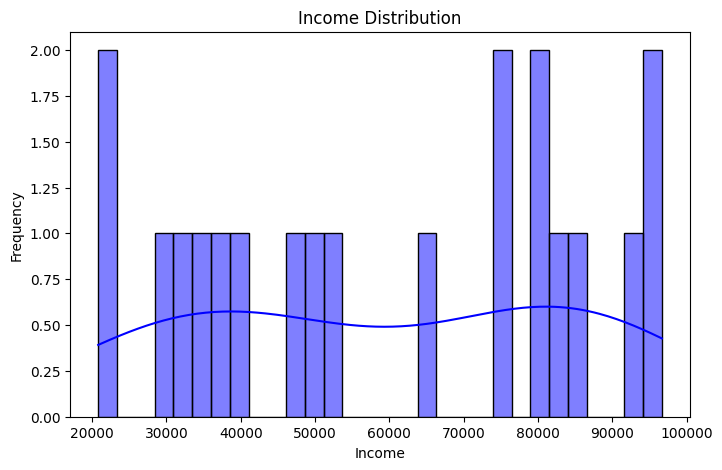

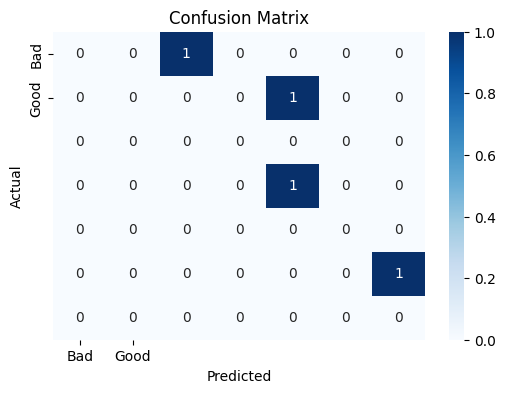

Model Accuracy: 0.0


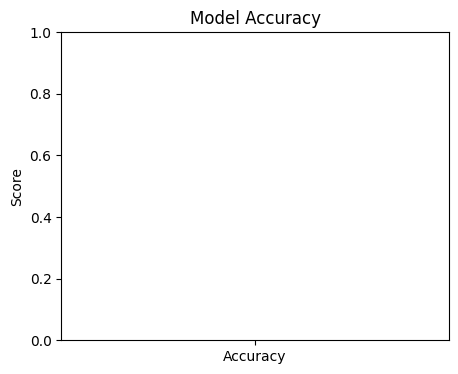

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 1️⃣ Load the dataset (Replace with your actual dataset)
df = pd.read_csv("credit_data.csv")

# 2️⃣ Select Features and Target
X = df[['CustomerID','Age', 'Income', 'LoanAmount', 'CreditScore']]  # Features
y = df['CreditScore']  # Target (1 = Good, 0 = Bad)

# 3️⃣ Visualize Credit Score Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="pastel")
plt.title("Credit Score Distribution")
plt.xlabel("CreditScore (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()

# 4️⃣ Visualize Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# 5️⃣ Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7️⃣ Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 8️⃣ Make Predictions
y_pred = model.predict(X_test)

# 9️⃣ Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔟 Show Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# 📊 Bar Chart for Model Accuracy
plt.figure(figsize=(5, 4))
plt.bar(["Accuracy"], [accuracy], color="green")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Accuracy")
plt.show()
